# HOUSING: PRICE PREDICTION

In [687]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [688]:
#Import the train data file
df_train=pd.read_csv("Housing_train.csv")
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [689]:
#Check rows & columns
print("(rows,columns)",df_train.shape)

(rows,columns) (1168, 81)


In [690]:
#Import the test data file
df_test=pd.read_csv("Housing_test.csv")
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [691]:
#Check rows & columns
print("(rows,columns)",df_test.shape)

(rows,columns) (292, 80)


In [692]:
#Combine both the datasets for data anlysis by a reference column
df_train["ref"]= "train"
df_test["ref"]="test"

In [693]:
#Merging both the datasets
df=pd.concat([df_train,df_test],ignore_index=True)

In [694]:
#Display dataset
pd.set_option('display.max_columns',None)
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL          NaN     4928   Pave   NaN      IR1   
1      889          20       RL         95.0    15865   Pave   NaN      IR1   
2      793          60       RL         92.0     9920   Pave   NaN      IR1   
3      110          20       RL        105.0    11751   Pave   NaN      IR1   
4      422          20       RL          NaN    16635   Pave   NaN      IR1   
5     1197          60       RL         58.0    14054   Pave   NaN      IR1   
6      561          20       RL          NaN    11341   Pave   NaN      IR1   
7     1041          20       RL         88.0    13125   Pave   NaN      Reg   
8      503          20       RL         70.0     9170   Pave   NaN      Reg   
9      576          50       RL         80.0     8480   Pave   NaN      Reg   
10     449          50       RM         50.0     8600   Pave   NaN      Reg   
11     833          60       RL         44.0     9548   Pave   NaN      IR1   
12     277          20       RL        129.0     9196   Pave   NaN      IR1   
13      84          20       RL         80.0     8892   Pave   NaN      IR1   
14     888          50       RL         59.0    16466   Pave   NaN      IR1   
15    1013          70       RL         55.0    10592   Pave   NaN      Reg   
16    1154          30       RM          NaN     5890   Pave   NaN      Reg   
17     728          20       RL         64.0     7314   Pave   NaN      Reg   
18     270          20       RL          NaN     7917   Pave   NaN      IR1   
19    1105         160       RM         24.0     2016   Pave   NaN      Reg   
20     259          60       RL         80.0    12435   Pave   NaN      Reg   
21    1407          85       RL         70.0     8445   Pave   NaN      Reg   
22    1459          20       RL         68.0     9717   Pave   NaN      Reg   
23     997          20       RL          NaN    10659   Pave   NaN      IR1   
24    1094          20       RL         71.0     9230   Pave   NaN      Reg   
25     114          20       RL          NaN    21000   Pave   NaN      Reg   
26    1384          30       RL          NaN    25339   Pave   NaN      Reg   
27     379          20       RL         88.0    11394   Pave   NaN      Reg   
28     556          45       RM         58.0     6380   Pave   NaN      Reg   
29     464          70       RL         74.0    11988   Pave   NaN      IR1   
30      46         120       RL         61.0     7658   Pave   NaN      Reg   
31     426          60       RM         60.0     3378   Pave  Grvl      Reg   
32    1231          90       RL          NaN    18890   Pave   NaN      IR1   
33     171          50       RM          NaN    12358   Pave   NaN      IR1   
34     869          60       RL          NaN    14762   Pave   NaN      IR2   
35     151          20       RL        120.0    10356   Pave   NaN      Reg   
36     859          20       RL         80.0    10400   Pave   NaN      Reg   
37     176          20       RL         84.0    12615   Pave   NaN      Reg   
38     361          85       RL          NaN     7540   Pave   NaN      IR1   
39     590          40       RM         50.0     9100   Pave   NaN      Reg   
40     172          20       RL        141.0    31770   Pave   NaN      IR1   
41     527          20       RL         70.0    13300   Pave   NaN      Reg   
42    1365         160       FV         30.0     3180   Pave  Pave      Reg   
43     146         160       RM         24.0     2522   Pave   NaN      Reg   
44    1006          80       RL         65.0     8385   Pave   NaN      Reg   
45     275          20       RL         76.0     8314   Pave   NaN      Reg   
46     380          60       RL         60.0     8123   Pave   NaN      IR1   
47    1309          20       RM        100.0    12000   Pave   NaN      Reg   
48     534          20       RL         50.0     5000   Pave   NaN      Reg   
49     494          20       RL         70.0     7931   Pa

In [695]:
#Check rows & columns after concatenation
df.shape

(1460, 82)

In [696]:
#Check the data types of the varaibles
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [697]:
#Check the null values
pd.set_option('display.max_rows',None)
df.isnull().sum()
#There are null values in variables

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [698]:
df.Id.isnull().sum()

0

In [699]:
# Find the columns having null values & their datatype
null_col=[]
dtype=[]
col=df.columns
for i in col:
    if (df[i].isnull().sum()>0):
        null_col.append(i)
        
for i in null_col:
    dtype.append(df[i].dtype)  

In [700]:
nul_col=pd.DataFrame()
nul_col["Column with Null values"]=pd.Series(null_col)
nul_col["Datatype"]=pd.Series(dtype)
nul_col

Column with Null values Datatype
0              LotFrontage  float64
1                    Alley   object
2               MasVnrType   object
3               MasVnrArea  float64
4                 BsmtQual   object
5                 BsmtCond   object
6             BsmtExposure   object
7             BsmtFinType1   object
8             BsmtFinType2   object
9               Electrical   object
10             FireplaceQu   object
11              GarageType   object
12             GarageYrBlt  float64
13            GarageFinish   object
14              GarageQual   object
15              GarageCond   object
16                  PoolQC   object
17                   Fence   object
18             MiscFeature   object
19               SalePrice  float64

In [701]:
#Handle the missing values according to the data type
#Incase of numeric dataset we will replace by "mean/median"
#Incase of object data type we will replace by "mode"

In [702]:
#Filter the "nul_col" with "float64" datatype
nul_col[nul_col["Datatype"] == "float64"]

Column with Null values Datatype
0              LotFrontage  float64
3               MasVnrArea  float64
12             GarageYrBlt  float64
19               SalePrice  float64

In [703]:
#Replace the missing values in numeric dataype with feature mean except target variable "SalePrice"
df["LotFrontage"]=df.LotFrontage.fillna(df.LotFrontage.mean())
df["MasVnrArea"]=df.MasVnrArea.fillna(df.MasVnrArea.mean())
df["GarageYrBlt"]=df.GarageYrBlt.fillna(df.GarageYrBlt.mean())

In [704]:
#Check the null values
print(df.LotFrontage.isnull().sum())
print(df.MasVnrArea.isnull().sum())
print(df.GarageYrBlt.isnull().sum())
print(df.SalePrice.isnull().sum())

0
0
0
292


In [705]:
#Check the shape
print(df.LotFrontage.shape)
print(df.MasVnrArea.shape)
print(df.GarageYrBlt.shape)
print(df.SalePrice.shape)

(1460,)
(1460,)
(1460,)
(1460,)


In [706]:
#Filter the "nul_col" with "object" datatype
nul_col[nul_col["Datatype"] == "object"]

Column with Null values Datatype
1                    Alley   object
2               MasVnrType   object
4                 BsmtQual   object
5                 BsmtCond   object
6             BsmtExposure   object
7             BsmtFinType1   object
8             BsmtFinType2   object
9               Electrical   object
10             FireplaceQu   object
11              GarageType   object
13            GarageFinish   object
14              GarageQual   object
15              GarageCond   object
16                  PoolQC   object
17                   Fence   object
18             MiscFeature   object

In [707]:
#Handling missing values from columns with "object" datatype
#1. Alley
print(df.Alley.nunique())
print(df.Alley.unique())
print(df.Alley.value_counts())

2
[nan 'Grvl' 'Pave']
Grvl    50
Pave    41
Name: Alley, dtype: int64


In [708]:
#Check the percentage of missing values in "Alley" column
print("Percentage of missing values in Alley columns =",((1460-91)/1460)*100)

Percentage of missing values in Alley columns = 93.76712328767123


In [709]:
#As per data description the feature has:
#Grvl - Gravel
#Pave - Paved
#NA - No alley access

#As column has 93% missing data we drop the feature
df.drop(columns=["Alley"],inplace=True)

In [710]:
#2. MasVnrType
print(df.MasVnrType.isnull().sum())
print(df.MasVnrType.unique())
print(df.MasVnrType.value_counts())

8
['None' 'BrkFace' 'Stone' 'BrkCmn' nan]
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [711]:
#FIll the nan value with median ie "None"
df["MasVnrType"]=df.MasVnrType.fillna("None")

In [712]:
#3. BsmtQual
print(df.BsmtQual.isnull().sum())
print(df.BsmtQual.unique())
print(df.BsmtQual.value_counts())

37
['Gd' 'TA' 'Ex' nan 'Fa']
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


In [713]:
#BsmtQual: Evaluates the height of the basement
       #Ex	Excellent (100+ inches)	
       #Gd	Good (90-99 inches)
       #TA	Typical (80-89 inches)
       #Fa	Fair (70-79 inches)
       #Po	Poor (<70 inches
       #NA	No Basement
        
#FIll the nan value with median ie "TA"
df["BsmtQual"]=df.BsmtQual.fillna("TA")

In [714]:
#4. BsmtCond
print(df.BsmtCond.isnull().sum())
print(df.BsmtCond.unique())
print(df.BsmtCond.value_counts())

37
['TA' 'Gd' 'Fa' nan 'Po']
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64


In [715]:
#BsmtCond: Evaluates the general condition of the basement
       #Ex	Excellent
       #Gd	Good
       #TA	Typical - slight dampness allowed
       #Fa	Fair - dampness or some cracking or settling
       #Po	Poor - Severe cracking, settling, or wetness
       #NA	No Basement
        
#FIll the nan value with median ie "TA"
df["BsmtCond"]=df.BsmtCond.fillna("TA")

In [716]:
#4. BsmtExposure
print(df.BsmtExposure.isnull().sum())
print(df.BsmtExposure.unique())
print(df.BsmtExposure.value_counts())

38
['No' 'Gd' 'Av' 'Mn' nan]
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


In [717]:
#BsmtExposure: Refers to walkout or garden level walls
       #Gd	Good Exposure
       #Av	Average Exposure (split levels or foyers typically score average or above)	
       #Mn	Mimimum Exposure
       #No	No Exposure
       #NA	No Basement
    
#FIll the nan value with median ie "No"
df["BsmtExposure"]=df.BsmtExposure.fillna("No")

In [718]:
#5. BsmtFinType1
print(df.BsmtFinType1.isnull().sum())
print(df.BsmtFinType1.unique())
print(df.BsmtFinType1.value_counts())

37
['ALQ' 'GLQ' 'BLQ' 'Unf' 'Rec' 'LwQ' nan]
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


In [719]:
#BsmtFinType1: Rating of basement finished area
       #GLQ	Good Living Quarters
       #ALQ	Average Living Quarters
       #BLQ	Below Average Living Quarters	
       #Rec	Average Rec Room
       #LwQ	Low Quality
       #Unf	Unfinshed
       #NA	No Basement
    
#FIll the nan value with median ie "Unf"
df["BsmtFinType1"]=df.BsmtFinType1.fillna("Unf")

In [720]:
#6. BsmtFinType2
print(df.BsmtFinType2.isnull().sum())
print(df.BsmtFinType2.unique())
print(df.BsmtFinType2.value_counts())

38
['Unf' 'Rec' 'BLQ' 'GLQ' nan 'ALQ' 'LwQ']
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


In [721]:
#BsmtFinType2: Rating of basement finished area (if multiple types)
       #GLQ	Good Living Quarters
       #ALQ	Average Living Quarters
       #BLQ	Below Average Living Quarters	
       #Rec	Average Rec Room
       #LwQ	Low Quality
       #Unf	Unfinshed
       #NA	No Basement
    
#Fill the nan value with median ie "Unf"
df["BsmtFinType2"]=df.BsmtFinType2.fillna("Unf")

In [722]:
#7. Electrical
print(df.Electrical.isnull().sum())
print(df.Electrical.unique())
print(df.Electrical.value_counts())

1
['SBrkr' 'FuseA' 'FuseF' 'FuseP' 'Mix' nan]
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [723]:
#Electrical: Electrical system
       #SBrkr	Standard Circuit Breakers & Romex
       #FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       #FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       #FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       #Mix	Mixed
    
#Fill the nan value with median ie "SBrkr"
df["Electrical"]=df.Electrical.fillna("SBrkr")

In [724]:
#8. FireplaceQu
print(df.FireplaceQu.isnull().sum())
print(df.FireplaceQu.unique())
print(df.FireplaceQu.value_counts())

690
['TA' 'Gd' nan 'Fa' 'Ex' 'Po']
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


In [725]:
#FireplaceQu: Fireplace quality
       #Ex	Excellent - Exceptional Masonry Fireplace
       #Gd	Good - Masonry Fireplace in main level
       #TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       #Fa	Fair - Prefabricated Fireplace in basement
       #Po	Poor - Ben Franklin Stove
       #NA	No Fireplace

#Fill the nan value with median ie "Gd"
df["FireplaceQu"]=df.FireplaceQu.fillna("Gd")

In [726]:
#9. GarageType
print(df.GarageType.isnull().sum())
print(df.GarageType.unique())
print(df.GarageType.value_counts())

81
['Attchd' 'BuiltIn' 'Detchd' 'Basment' nan '2Types' 'CarPort']
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


In [727]:
#GarageType: Garage location
       #2Types	More than one type of garage
       #Attchd	Attached to home
       #Basment	Basement Garage
       #BuiltIn	Built-In (Garage part of house - typically has room above garage)
       #CarPort	Car Port
       #Detchd	Detached from home
       #NA	No Garage

#Fill the nan value with median ie "Attchd"
df["GarageType"]=df.GarageType.fillna("Attchd")

In [728]:
#10. GarageFinish
print(df.GarageFinish.isnull().sum())
print(df.GarageFinish.unique())
print(df.GarageFinish.value_counts())

81
['RFn' 'Unf' 'Fin' nan]
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64


In [729]:
#GarageFinish: Interior finish of the garage
       #Fin	Finished
       #RFn	Rough Finished	
       #Unf	Unfinished
       #NA	No Garage

#Fill the nan value with median ie "Unf"
df["GarageFinish"]=df.GarageFinish.fillna("Unf")

In [730]:
#11. GarageQual
print(df.GarageQual.isnull().sum())
print(df.GarageQual.unique())
print(df.GarageQual.value_counts())

81
['TA' 'Fa' nan 'Gd' 'Ex' 'Po']
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64


In [731]:
#GarageQual: Garage quality
       #Ex	Excellent
       #Gd	Good
       #TA	Typical/Average
       #Fa	Fair
       #Po	Poor
       #NA	No Garage

#Fill the nan value with median ie "TA"
df["GarageQual"]=df.GarageQual.fillna("TA")

In [732]:
#12. GarageCond
print(df.GarageCond.isnull().sum())
print(df.GarageCond.unique())
print(df.GarageCond.value_counts())

81
['TA' 'Fa' 'Gd' nan 'Po' 'Ex']
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


In [733]:
#GarageCond: Garage condition
       #Ex	Excellent
       #Gd	Good
       #TA	Typical/Average
       #Fa	Fair
       #Po	Poor
       #NA	No Garage
#Fill the nan value with median ie "TA"
df["GarageCond"]=df.GarageCond.fillna("TA")

In [734]:
#13. PoolQC
print(df.PoolQC.isnull().sum())
print(df.PoolQC.unique())
print(df.PoolQC.value_counts())

1453
[nan 'Ex' 'Gd' 'Fa']
Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64


In [735]:
#Check the percentage of missing values in "PoolQC" column
print("Percentage of missing values in PoolQC columns =",((1460-7)/1460)*100)

Percentage of missing values in PoolQC columns = 99.52054794520548


In [736]:
#PoolQC: Pool quality
       #Ex	Excellent
       #Gd	Good
       #TA	Average/Typical
       #Fa	Fair
       #NA	No Pool
    
#Almost 99.5% data is missing , hence we drop the feature
df.drop(columns=["PoolQC"],inplace=True)

In [737]:
#14. Fence
print(df.Fence.isnull().sum())
print(df.Fence.unique())
print(df.Fence.value_counts())

1179
[nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64


In [738]:
#Check the percentage of missing values in "Fence" column
print("Percentage of missing values in Fence columns =",((1460-281)/1460)*100)

Percentage of missing values in Fence columns = 80.75342465753424


In [739]:
#Almost 80.6% data is missing , hence we drop the feature
df.drop(columns=["Fence"],inplace=True)

In [740]:
#15. MiscFeature
print(df.MiscFeature.isnull().sum())
print(df.MiscFeature.unique())
print(df.MiscFeature.value_counts())

1406
[nan 'Shed' 'Gar2' 'TenC' 'Othr']
Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64


In [741]:
#Check the percentage of missing values in "MiscFeature" column
print("Percentage of missing values in MiscFeature columns =",((1460-54)/1460)*100)

Percentage of missing values in MiscFeature columns = 96.30136986301369


In [742]:
# 96.3% data is missing , hence we drop the feature
df.drop(columns=["MiscFeature"],inplace=True)

In [743]:
df.isnull().sum()
#No null values found

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [744]:
#Check dataframe
#df will be used for EDA
#dfn will be used for Data Pre-Processing
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  127         120       RL    70.049958     4928   Pave      IR1         Lvl   
1  889          20       RL    95.000000    15865   Pave      IR1         Lvl   
2  793          60       RL    92.000000     9920   Pave      IR1         Lvl   
3  110          20       RL   105.000000    11751   Pave      IR1         Lvl   
4  422          20       RL    70.049958    16635   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1    AllPub    Inside       Mod        NAmes       Norm       Norm     1Fam   
2    AllPub   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3    AllPub    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl       NWAmes       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            6            5       1976          1976     Gable   
1     1Story            8            6       1970          1970      Flat   
2     2Story            7            5       1996          1997     Gable   
3     1Story            6            6       1977          1977       Hip   
4     1Story            6            7       1977          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     Plywood     Plywood       None         0.0        TA        TA   
1  Tar&Grv     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2  CompShg     MetalSd     MetalSd       None         0.0        Gd        TA   
3  CompShg     Plywood     Plywood    BrkFace       480.0        TA        TA   
4  CompShg     CemntBd     CmentBd      Stone       126.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   
2      PConc       Gd       TA           Av          GLQ         862   
3     CBlock       Gd       TA           No          BLQ         705   
4     CBlock       Gd       TA           No          ALQ        1246   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   
1          Rec         823       1043         2217    GasA        Ex   
2          Unf           0        255         1117    GasA        Ex   
3          Unf           0       1139         1844    GasA        Ex   
4          Unf           0        356         1602    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       958         0             0        958   
1          Y      SBrkr      2217         0             0       2217   
2          Y      SBrkr      1127       886             0       2013   
3          Y      SBrkr      1844         0             0       1844   
4          Y      SBrkr      1602         0             0       1602   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          TA             5        Typ           1          TA     Attchd   
1          Gd             8        Typ           1          TA     Attchd   
2          TA             8        Typ           1          TA     Attchd  

In [745]:
#Assign the train data to "dfn_train" for EDA
dfn_train=df[0:1168]

# EDA

<AxesSubplot:ylabel='Frequency'>

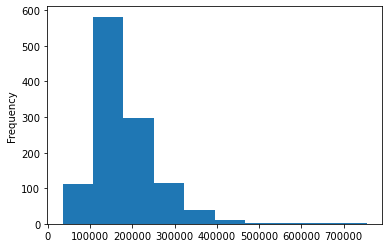

In [746]:
#Univariate Anlaysis
#Check target variables
dfn_train.SalePrice.plot.hist()

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

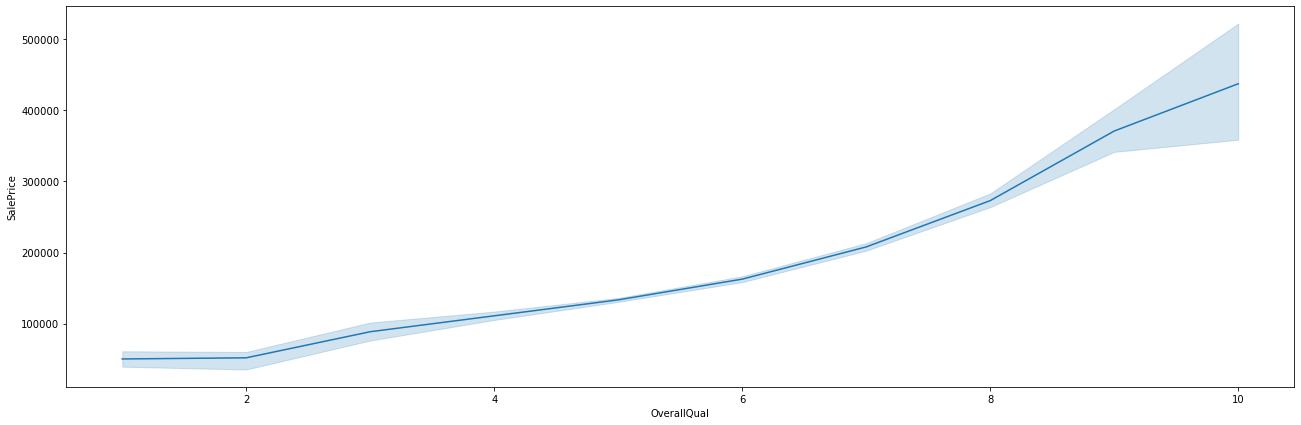

In [747]:
#Bi variate analysis
#OverallQual vs SalePrice
plt.figure(figsize=(22,7))
sns.lineplot(x="OverallQual",y="SalePrice",data=dfn_train)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

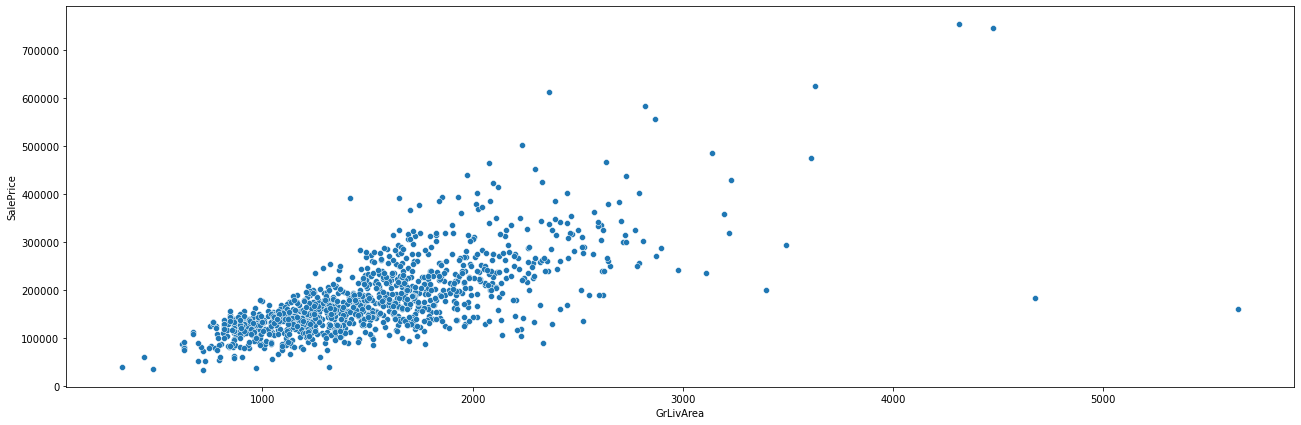

In [748]:
#GrLivArea vs SalePrice
plt.figure(figsize=(22,7))
sns.scatterplot(x="GrLivArea",y="SalePrice",data=dfn_train)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

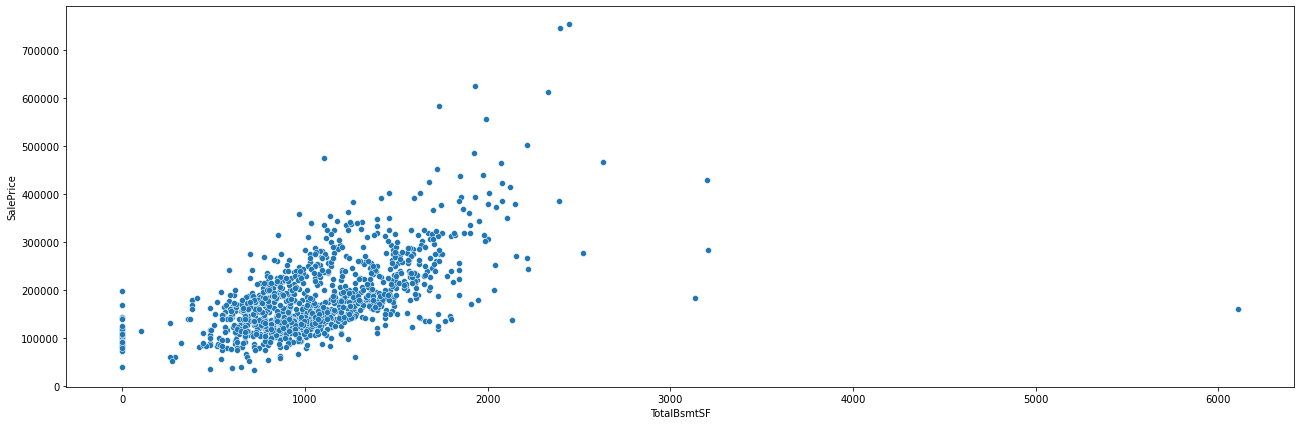

In [749]:
#TotalBsmtSF vs SalePrice
plt.figure(figsize=(22,7))
sns.scatterplot(x="TotalBsmtSF",y="SalePrice",data=dfn_train)

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

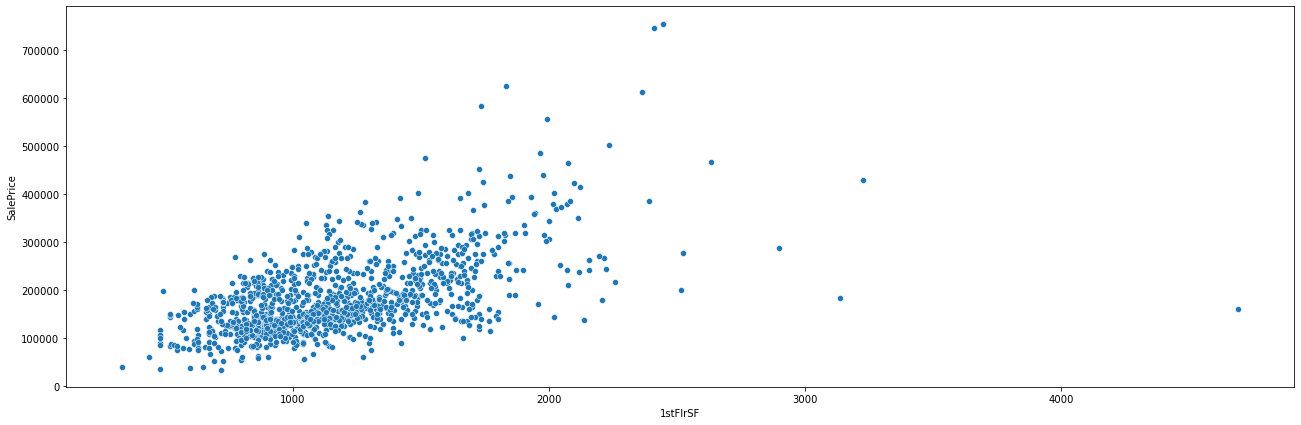

In [750]:
#1stFlrSF vs SalePrice
plt.figure(figsize=(22,7))
sns.scatterplot(x="1stFlrSF",y="SalePrice",data=dfn_train)

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

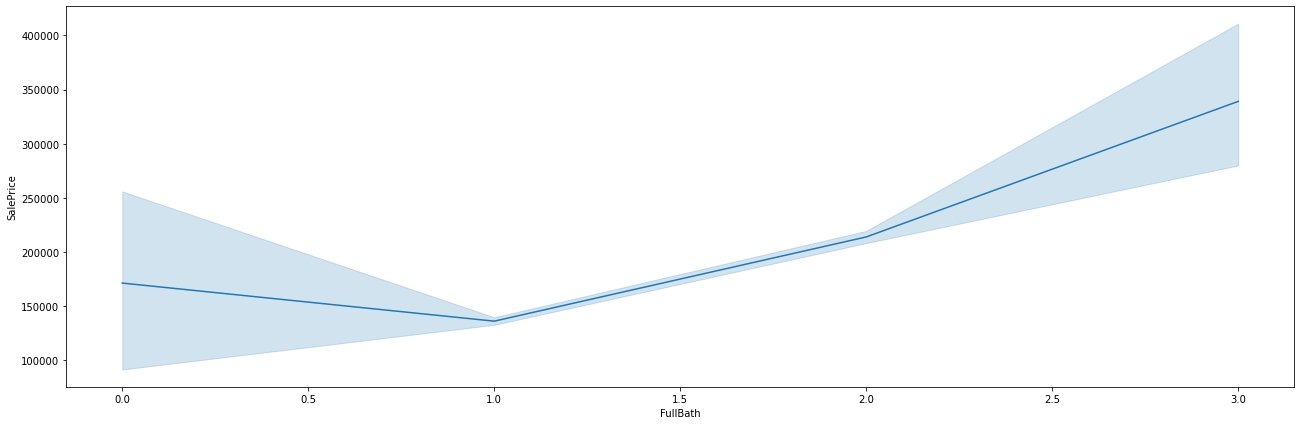

In [751]:
#FullBath vs SalePrice
plt.figure(figsize=(22,7))
sns.lineplot(x="FullBath",y="SalePrice",data=dfn_train)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

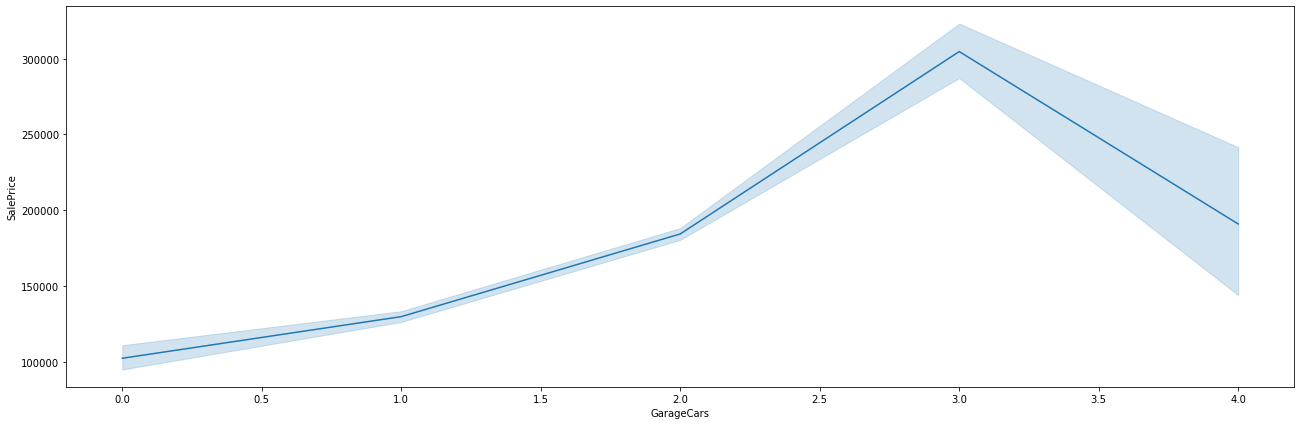

In [752]:
#GarageCars vs SalePrice
plt.figure(figsize=(22,7))
sns.lineplot(x="GarageCars",y="SalePrice",data=dfn_train)

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

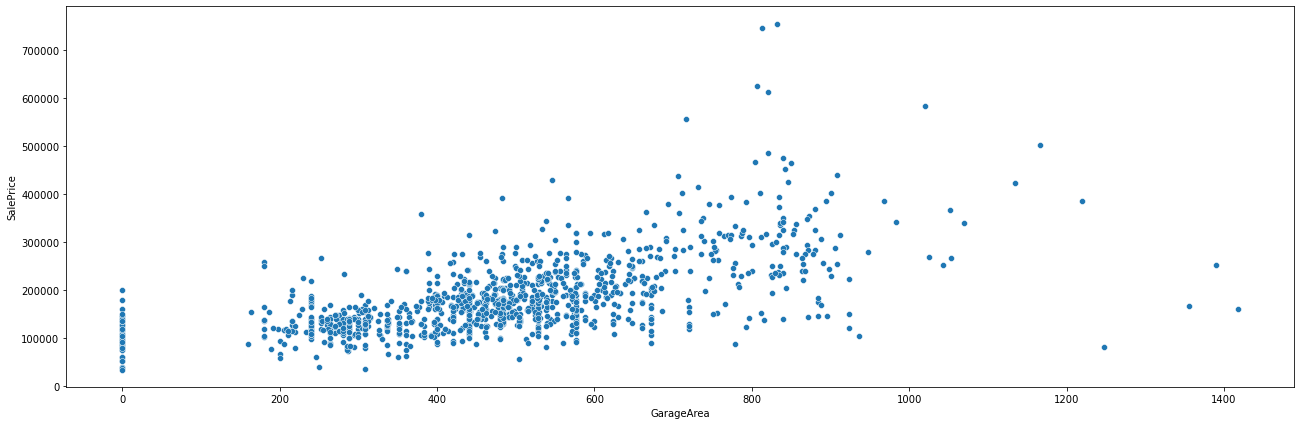

In [753]:
#GarageArea vs SalePrice
plt.figure(figsize=(22,7))
sns.scatterplot(x="GarageArea",y="SalePrice",data=dfn_train)

<AxesSubplot:xlabel='LowQualFinSF', ylabel='SalePrice'>

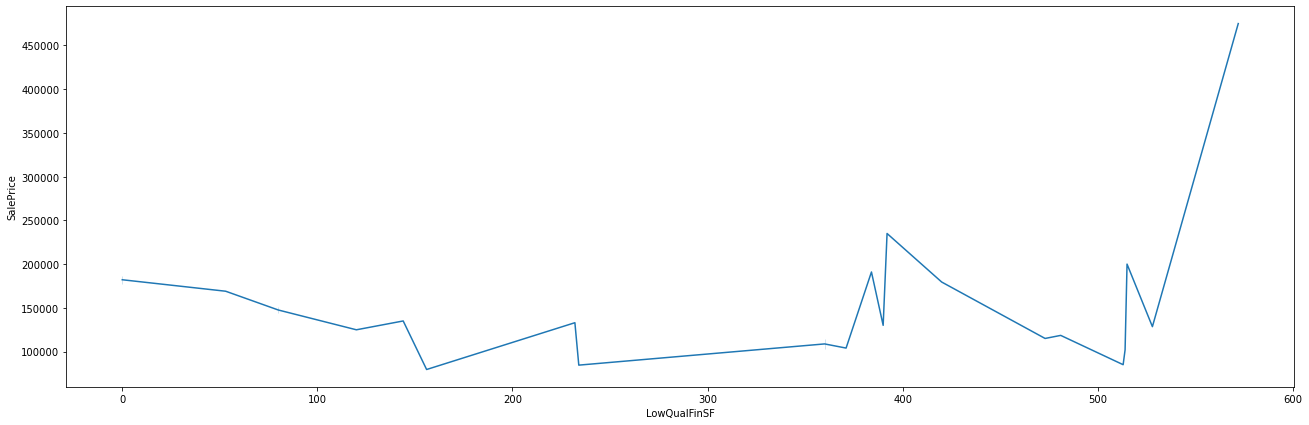

In [754]:
#Features that affect the Hose price negatively
#LowQualFinSF vs SalePrice
plt.figure(figsize=(22,7))
sns.lineplot(x="LowQualFinSF",y="SalePrice",data=dfn_train)

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='SalePrice'>

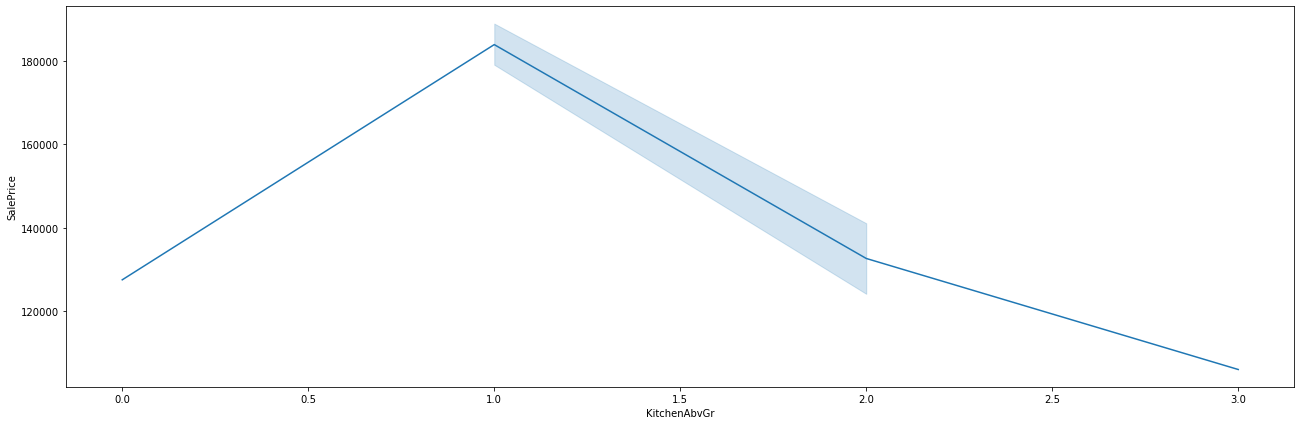

In [755]:
#KitchenAbvGr vs SalePrice
plt.figure(figsize=(22,7))
sns.lineplot(x="KitchenAbvGr",y="SalePrice",data=dfn_train)

<AxesSubplot:xlabel='EnclosedPorch', ylabel='SalePrice'>

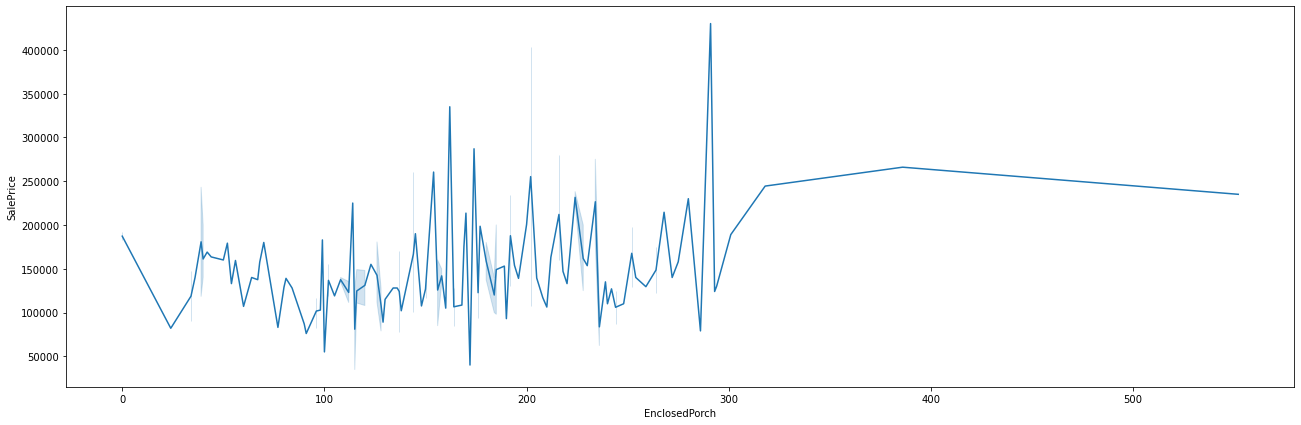

In [756]:
#EnclosedPorch vs SalePrice
plt.figure(figsize=(22,7))
sns.lineplot(x="EnclosedPorch",y="SalePrice",data=dfn_train)

<AxesSubplot:xlabel='MiscVal', ylabel='SalePrice'>

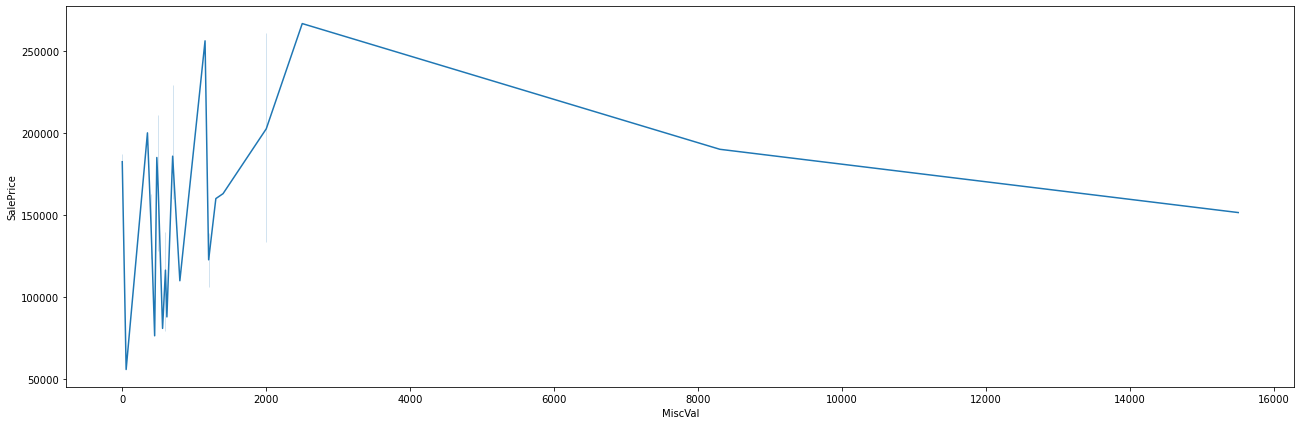

In [757]:
#MiscVal vs SalePrice
plt.figure(figsize=(22,7))
sns.lineplot(x="MiscVal",y="SalePrice",data=dfn_train)

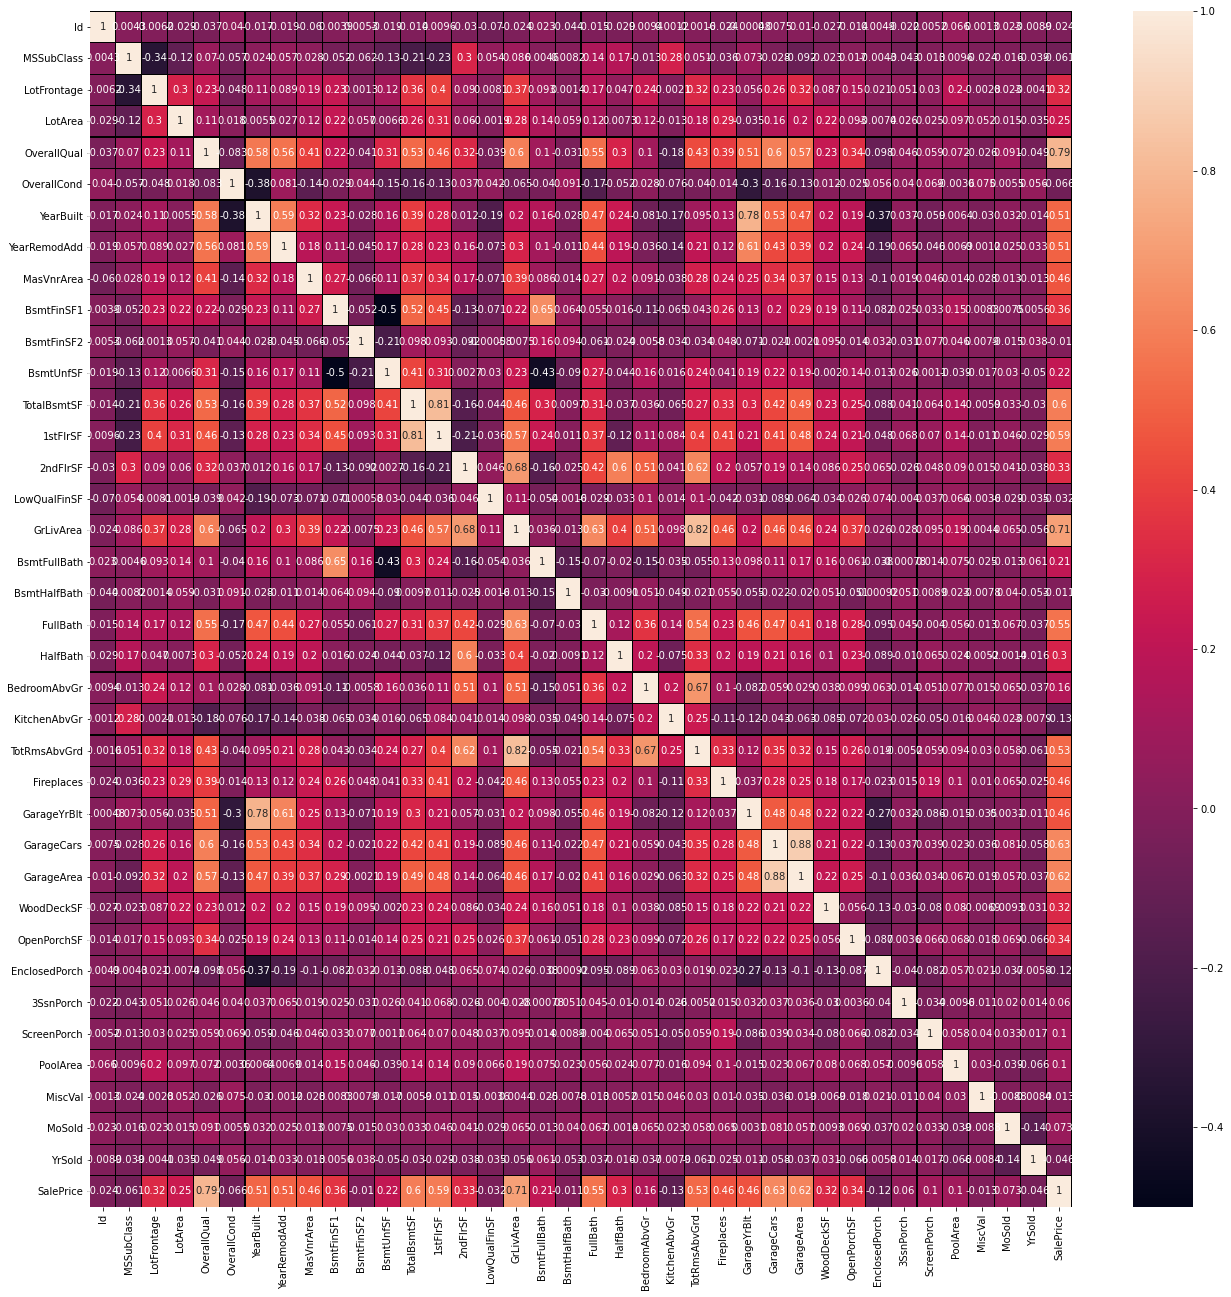

In [758]:
#Multi Variate Analysis
plt.figure(figsize=(22,22))
sns.heatmap(dfn_train.corr(),annot=True,linewidth=0.1,linecolor="Black")
plt.show()

# Data- Preprocessing

In [761]:
#Assumption : Feature = "Street","Utilities","Condition2"
#99% of data is same in the feature, hence it can be dropped as there is no variance
df.drop(columns=["Street","Utilities"],inplace=True)

KeyError: "['Street' 'Utilities'] not found in axis"

In [ ]:
#Feature engineering
#YearBuilt
#Feature "YearBuilt" describes how old the house is but the values wont appropriately contribute to model building
#Assuming that the oldest house has high price, we can categorize the feature 
print("Oldest house was built in year=",df.YearBuilt.min())
print("Latest house was built in year=",df.YearBuilt.max())
print("Range =",df.YearBuilt.max() - df.YearBuilt.min())

#We will divide the range into 10 intervals ie 14 years
#It means the house built in 14 years span belong to same rating

# 1872-1885: 10
# 1886-1899: 9
# 1900-1913: 8
# 1914-1927: 7
# 1928-1941: 6
# 1942-1955: 5
# 1956-1969: 4
# 1970-1993: 3
# 1984-2007: 2
# 1998-2012: 1

In [ ]:
#We will divide the range into 10 intervals ie 14 years
#It means the house built in 14 years span belong to same rating

# 1872-1885: 10
# 1886-1899: 9
# 1900-1913: 8
# 1914-1927: 7
# 1928-1941: 6
# 1942-1955: 5
# 1956-1969: 4
# 1970-1993: 3
# 1984-2007: 2
# 1998-2012: 1

#New feature "AgeRating" extracted wrt "YearBuilt"
df["AgeRating"]=np.where((df["YearBuilt"]>=1872)&(df["YearBuilt"]<=1885),10,
                        np.where((df["YearBuilt"]>=1886)&(df["YearBuilt"]<1899),9,
                                 np.where((df["YearBuilt"]>=1900)&(df["YearBuilt"]<1913),8,
                                          np.where((df["YearBuilt"]>=1914)&(df["YearBuilt"]<1927),7,
                                                   np.where((df["YearBuilt"]>=1928)&(df["YearBuilt"]<1941),6,
                                                            np.where((df["YearBuilt"]>=1942)&(df["YearBuilt"]<1955),5,
                                                                     np.where((df["YearBuilt"]>=1956)&(df["YearBuilt"]<1969),4,
                                                                              np.where((df["YearBuilt"]>=1970)&(df["YearBuilt"]<1983),3,
                                                                                       np.where((df["YearBuilt"]>=1984)&(df["YearBuilt"]<1997),2,1)))))))))                           

In [ ]:
#YearRemodAdd
#As per feature description - YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

#Assuming that house with remodel costs more.
#We compare feature "YearBuilt" & "YearRemodAdd" : new feature "RemodRating" can be derived
# if value are same then: RemodRating = 0     (ie No remodelling done)
# if value are not same then: RemodRating = 1 (ie Remodelling done)
RemodRating=[]
for i in range(len(dfn.YearRemodAdd)):
    if (dfn.YearBuilt[i] == dfn.YearRemodAdd[i]):
        RemodRating.append(0)
    else:
        RemodRating.append(1)
dfn["RemodRating"]= pd.Series(RemodRating)

In [762]:
dfn.RemodRating.value_counts()

0    764
1    696
Name: RemodRating, dtype: int64

<AxesSubplot:xlabel='RemodRating', ylabel='count'>

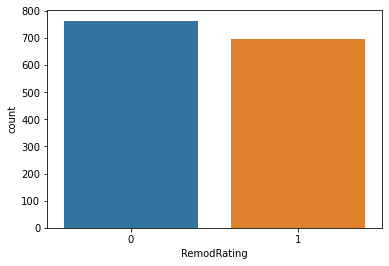

In [763]:
# 696 out of 1460 houses are remodelled 
sns.countplot(x="RemodRating",data=dfn)

In [764]:
#Filter ths columns with "object" dtype
obj_col=[]
for i in range(len(df.dtypes)):
    if (df.dtypes[i] == "object"):
        obj_col.append(df.dtypes.index[i])
obj_col

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'ref']

In [765]:
#Check if the columns with object datatype have same values.
#If the feature has same values throughout , then feature can be dropped
del_col=[]
for i in obj_col:
    if (df[i].nunique == 1):
        del_col.append(i)
del_col
#All the columns have 2 or more unique values 

[]

In [766]:
#Feature "ID" will not contribute to the model learning , hene it will be dropped
#Feature "YearBuilt" & "YearRemodAdd" can be dropped as new feature extracted.
df.drop(columns=["Id","YearBuilt","YearRemodAdd"],inplace=True)

In [772]:
#Check shape before using encoder
df.shape

(1460, 73)

In [773]:
#Using get dummies convert data to numeric
df_final=pd.get_dummies(df,columns=['MSZoning', 'LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1',
                                    'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                                    'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure',
                                    'BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual',
                                    'Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
                                    'PavedDrive','SaleType','SaleCondition'],drop_first=True)
df_final.shape

(1460, 234)

In [774]:
df_final.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0         120    70.049958     4928            6            5         0.0   
1          20    95.000000    15865            8            6         0.0   
2          60    92.000000     9920            7            5         0.0   
3          20   105.000000    11751            6            6       480.0   
4          20    70.049958    16635            6            7       126.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         120           0        958         1078       958         0   
1         351         823       1043         2217      2217         0   
2         862           0        255         1117      1127       886   
3         705           0       1139         1844      1844         0   
4        1246           0        356         1602      1602         0   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0        958             0             0         2         0   
1             0       2217             1             0         2         0   
2             0       2013             1             0         2         1   
3             0       1844             0             0         2         0   
4             0       1602             0             1         2         0   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0             2             1             5           1       1977.0   
1             4             1             8           1       1970.0   
2             3             1             8           1       1997.0   
3             3             1             7           1       1977.0   
4             3             1             8           1       1977.0   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           2         440           0          205              0          0   
1           2         621          81          207              0          0   
2           2         455         180          130              0          0   
3           2         546           0          122              0          0   
4           2         529         240            0              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice    ref  \
0            0         0        0       2    2007   128000.0  train   
1          224         0        0      10    2007   268000.0  train   
2            0         0        0       6    2007   269790.0  train   
3            0         0        0       1    2010   190000.0  train   
4            0         0        0       6    2009   215000.0  train   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0                0                0   
1             0             0                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              0              0   
2                1                  1              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod

In [776]:
#Test data set
df_test_final=df_final[df_final["ref"]=="test"]
df_test_final.shape

(292, 234)

In [780]:
#Drop columns "ref" & "SalePrice" from test dataset 
df_test_final.drop(columns=["SalePrice","ref"],inplace=True)
df_test_final.shape 

(292, 232)

In [777]:
#Train data set
df_train_final=df_final[df_final["ref"]=="train"]
df_train_final.shape

(1168, 234)

In [782]:
#Drop columns "ref" from train dataset 
df_train_final.drop(columns=["ref"],inplace=True)
df_train_final.shape 

(1168, 233)

In [783]:
#Lets split training data into dependent & independent variables
df_x=df_train_final.drop(columns=["SalePrice"])
y=df_train_final["SalePrice"] #Independent variables
print(df_x.shape,y.shape) # Dependent variables

(1168, 232) (1168,)


In [784]:
#Data scaling to achieve more accuracy
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
0    1.508301    -0.034175 -0.620616    -0.075169    -0.530217   -0.562284   
1   -0.877042     1.078157  0.600903     1.364138     0.359572   -0.562284   
2    0.077095     0.944410 -0.063075     0.644484    -0.530217   -0.562284   
3   -0.877042     1.523981  0.141424    -0.075169     0.359572    2.075525   
4   -0.877042    -0.034175  0.686902    -0.075169     1.249361    0.130141   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0   -0.702161   -0.285392   0.864410     0.038239 -0.541850 -0.793674   
1   -0.202665    4.749787   1.053642     2.614679  2.678144 -0.793674   
2    0.902279   -0.285392  -0.700654     0.126458 -0.109619  1.222216   
3    0.562795   -0.285392   1.267363     1.770946  1.724166 -0.793674   
4    1.732609   -0.285392  -0.475801     1.223537  1.105232 -0.793674   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0     -0.125418  -1.074363     -0.816112     -0.235213  0.793082 -0.770138   
1     -0.125418   1.310934      1.101833     -0.235213  0.793082 -0.770138   
2     -0.125418   0.924437      1.101833     -0.235213  0.793082  1.211186   
3     -0.125418   0.604250     -0.816112     -0.235213  0.793082 -0.770138   
4     -0.125418   0.145757     -0.816112      3.991376  0.793082 -0.770138   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0     -1.082679     -0.209883     -0.965583    0.588509    -0.050064   
1      1.365664     -0.209883      0.911999    0.588509    -0.339460   
2      0.141492     -0.209883      0.911999    0.588509     0.776782   
3      0.141492     -0.209883      0.286138    0.588509    -0.050064   
4      0.141492     -0.209883      0.911999    0.588509    -0.050064   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0     0.29985   -0.171944   -0.762907     2.387850      -0.364375  -0.125172   
1     0.29985    0.672371   -0.120585     2.417992      -0.364375  -0.125172   
2     0.29985   -0.101973    0.664476     1.257525      -0.364375  -0.125172   
3     0.29985    0.322517   -0.762907     1.136957      -0.364375  -0.125172   
4     0.29985    0.243217    1.140270    -0.701705      -0.364375  -0.125172   

   ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  MSZoning_FV  \
0    -0.273377 -0.076845 -0.087131 -1.617822 -0.605487    -0.215859   
1     3.795117 -0.076845 -0.087131  1.361470 -0.605487    -0.215859   
2    -0.273377 -0.076845 -0.087131 -0.128176 -0.605487    -0.215859   
3    -0.273377 -0.076845 -0.087131 -1.990233  1.651563    -0.215859   
4    -0.273377 -0.076845 -0.087131 -0.128176  0.899213    -0.215859   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
0    -0.117851     0.508548    -0.402727     -0.167836     -0.071858   
1    -0.117851     0.508548    -0.402727     -0.167836     -0.071858   
2    -0.117851     0.508548    -0.402727     -0.167836     -0.071858   
3    -0.117851     0.508548    -0.402727     -0.167836     -0.071858   
4    -0.117851     0.508548    -0.402727     -0.167836     -0.071858   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0     -1.314904        -0.193133        -0.162364         0.341518   
1     -1.314904        -0.193133        -0.162364         0.341518   
2     -1.314904        -0.193133        -0.162364         0.341518   
3     -1.314904        -0.193133        -0.162364         0.341518   
4     -1.314904        -0.193133        -0.162364         0.341518   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0          -0.250568      -0.170514      -0.041416          0.622233   
1          -0.250568      -0.170514      -0.041416          0.622233   
2           3.990932      -0.170514      -0.041416         -1.607116   
3          -0.250568      -0.170514      -0.041416          0.622233   
4          -0.250568       5.864635      -0.041416         -1.607116   

In [794]:
#Considering n_components
from sklearn.decomposition import PCA
pca=PCA(n_components=175)
pc_x=pca.fit_transform(x)

#Information retained in data after dimensionality reduction
print("Percentage info retained in data=",(sum(pca.explained_variance_ratio_)*100))

Percentage info retained in data= 98.05271703646935


# Building Machine Learning Models

In [795]:
#Check best random state: Considering r2 metrics
#User-defined function to find r2 score:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [796]:
#User defined function for cross-validation
from sklearn.model_selection import cross_val_score
def cross_val(model,x,y):
    cv=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",cv.mean())
    print(cv)

In [797]:
#As datapoints are huge in number, we will check model for best "r2- score" then proceed with hyper-parameter tuning.

# 1.Decision Tree Regressor

In [798]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dt_r2=maxr2_score(dtr,pc_x,y)

max r2 score corresponding to  53  is  0.7258767589155597


In [799]:
#Cross validation (Decision tree)
cross_val(dtr,pc_x,y)

Mean r2 score for regressor:  0.5161373790747328
[0.53099171 0.55368055 0.47296049 0.52195243 0.50110172]


# 2.K Nearest Regressor

In [800]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
r_state=maxr2_score(knr,pc_x,y)

max r2 score corresponding to  74  is  0.793195809152064


In [801]:
#Cross validation (KNN Classifier)
cross_val(knr,pc_x,y)

Mean r2 score for regressor:  0.6782362977260494
[0.66750537 0.68517542 0.54330341 0.7503157  0.74488159]


# 3.Random Forest Regressor

In [804]:
#Check maxr2_score function
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr_r2=maxr2_score(rfr,pc_x,y)

max r2 score corresponding to  49  is  0.8791328630007117


In [805]:
#Cross validation (Random Forest)
cross_val(rfr,pc_x,y)

Mean r2 score for regressor:  0.7941464393082931
[0.78427416 0.81124034 0.70628763 0.82962562 0.83930445]


# 4. Ada-Boost Regressor

In [806]:
from sklearn.ensemble import AdaBoostRegressor
adr=AdaBoostRegressor()
r_state=maxr2_score(adr,pc_x,y)

max r2 score corresponding to  89  is  0.8154645937662629


In [807]:
#Cross validation (Adaboost Regressor)
cross_val(adr,pc_x,y)

Mean r2 score for regressor:  0.7228987360669794
[0.75766725 0.73012011 0.63809156 0.78773541 0.70087935]


In [809]:
# Random forest is the best performing model, Hence we will proceed with hyper parameter tuning

In [808]:
#Hyper Parameter tuning (random forest regressor)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
rgr = GridSearchCV(rfr, parameters, cv=5)
rgr.fit(pc_x, y)
rgr.best_params_

{'n_estimators': 500}

In [810]:
#Random Forest with hyper parameters
# Random state= 49
# Parameter={'n_estimators': 500}

x_train,x_test,y_train,y_test=train_test_split(pc_x,y,test_size=0.2,random_state=49)
rfr=RandomForestRegressor(n_estimators=500)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print("R2 score=",r2_score(y_test,y_pred))
print("RMSE=",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean abs error=",mean_absolute_error(y_test,y_pred))

R2 score= 0.8745145435057429
RMSE= 27601.958695404774
Mean abs error= 19061.425854700858


In [812]:
#Predict the values for test dataset
#Transform test dataset as per PCA
pca=PCA(n_components=175)
pc_x_test=pca.fit_transform(df_test_final)

In [814]:
#Predict price for test dataset using Random Forest
pred_price=rfr.predict(pc_x_test)

In [816]:
#Save into dataframe
house_pred_saleprice=pd.DataFrame(pred_price,columns=["SalePrice"])

In [817]:
#Save in CSV format
house_pred_saleprice.to_csv("House_Prices_Prediction.csv",index=False)